In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs_vs_cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, activations
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (224, 224)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (224, 224)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [3]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [4]:
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

In [5]:
model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,

    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
callback = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ReduceLROnPlateau(patience=2)
]

In [9]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds, callbacks = callback)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 211s 284ms/step - accuracy: 0.9169 - loss: 0.2057 - val_accuracy: 0.8776 - val_loss: 0.9477 - learning_rate: 0.0010
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 176s 281ms/step - accuracy: 0.9459 - loss: 0.1342 - val_accuracy: 0.9158 - val_loss: 0.6434 - learning_rate: 0.0010
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 176s 281ms/step - accuracy: 0.9622 - loss: 0.1049 - val_accuracy: 0.8646 - val_loss: 1.1962 - learning_rate: 0.0010
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 176s 281ms/step - accuracy: 0.9595 - loss: 0.1040 - val_accuracy: 0.8930 - val_loss: 0.6696 - learning_rate: 0.0010
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 176s 281ms/step - accuracy: 0.9735 - loss: 0.0688 - val_accuracy: 0.9798 - val_loss: 0.0675 - learning_rate: 1.0000e-04
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 176s 281ms/step - accuracy: 0.9812 - loss: 0.0456 - val_accuracy: 0.9832 - val_loss: 0.0417 - learning_rate: 1.0000e-04
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 176s 282ms/step 

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,198,021 (27.46 MB)

 Trainable params: 2,387,969 (9.11 MB)

 Non-trainable params: 34,112 (133.25 KB)

 Optimizer params: 4,775,940 (18.22 MB)

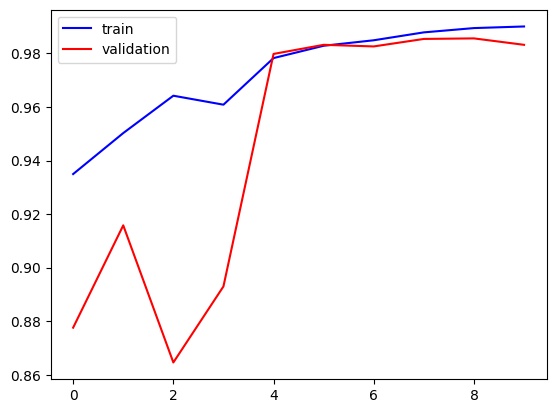

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='validation')
plt.legend()
plt.show()

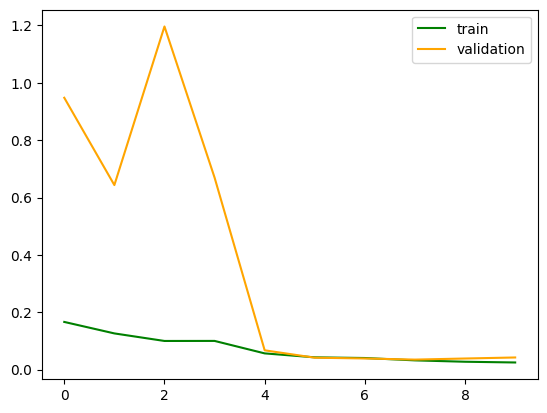

In [11]:
plt.plot(history.history['loss'], color='green', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.legend()
plt.show()

In [14]:
model.save("Dog_Cat_Classify.keras")